# Signal Reconstruction
The first cell, takes the origninal signal in `blue` and reconstructed signal (`orange`), that the evolutionary algorithm generated using weighted sum of the provided sub signals, and plot them. If only orange signal is visible, then we have a perfect match, else, the match is imperfect.

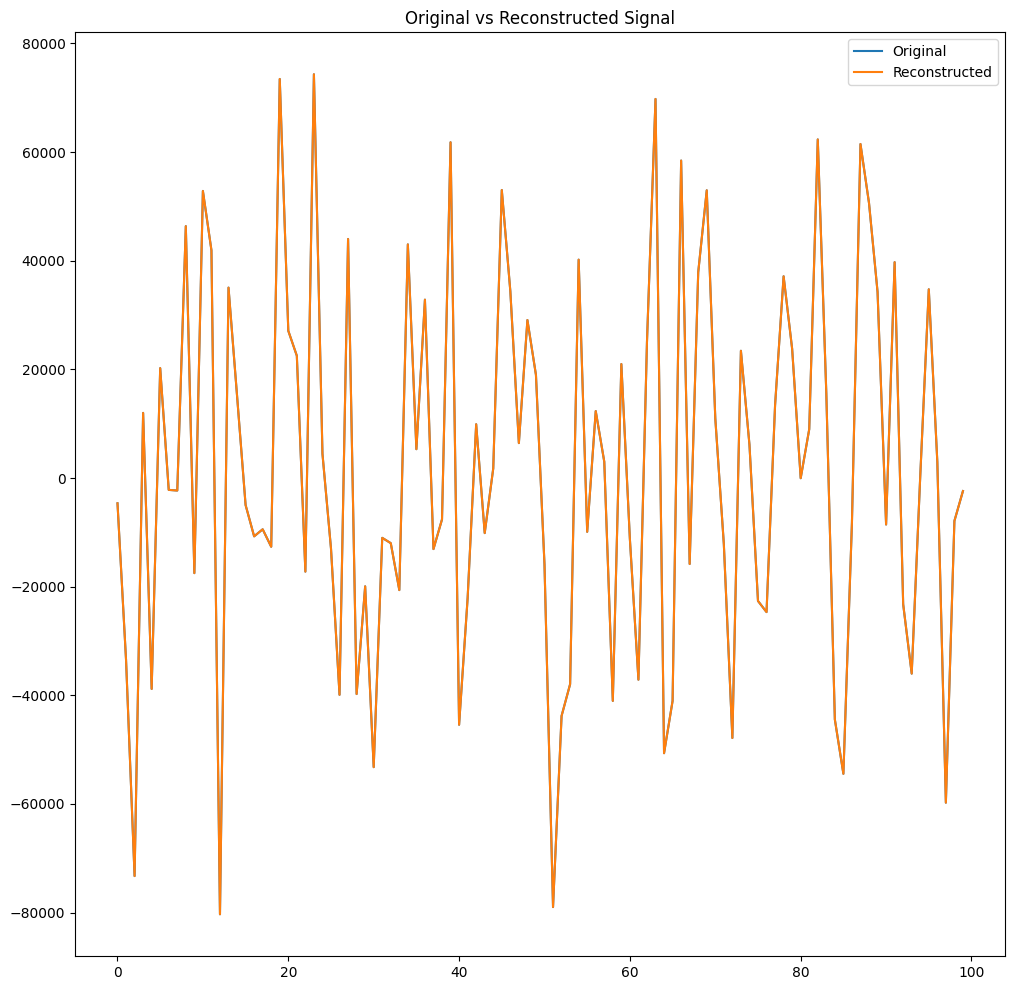

In [42]:
from matplotlib import pyplot as plt
import json
with open("data.json") as f:
    data = json.load(f)
    plt.figure(figsize=(12, 12))
    plt.title("Original vs Reconstructed Signal")
    plt.plot(data["originalTimeSeries"], label="Original")
    plt.plot(data["combinedTimeSeries"], label="Reconstructed")
    plt.legend()
    plt.show()

# Generating Data
In this cell we generate the data, that is of number of `iterations + 1`, quantity. The last entity is the actual optimal solution used for benchmark. Then if this data frame is more than 2 columns long, it is subjected to principle component analysis to compress it down to 2 components. Number of columns shows the number of wavelets the final signal is summation of.

In [43]:
import pandas as pd
def Generatedata(jsonData):
    df = pd.DataFrame()
    for key in list(jsonData["progression"][0]["coodrinates"].keys()):
        dataFragment = []
        for index in range(len(jsonData["progression"])):
            dataFragment.append(jsonData["progression"][index]["coodrinates"][key])
        df[key] = dataFragment
        columns = sorted(df.columns)
        df = df[columns]
    optimal = pd.DataFrame(data=[jsonData["optimal"]["coodrinates"]])
    df = pd.concat([df, optimal], ignore_index=True)
    return df

dataframe = Generatedata(data)
dataframe

,1,2,3,4,5
0,9.332391,11.538249,13.485033,7.406002,12.414393
1,9.332391,11.538249,13.485033,7.406002,12.414393
2,8.597195,11.029432,12.463969,7.340531,13.573338
3,9.172597,10.463956,1454.983085,9.893109,13.895148
4,8.487881,12.048454,2902.213087,84.628058,13.917267
...,...,...,...,...,...
4996,3193.743321,2418.914205,7427.724405,2685.973054,4492.911838
4997,3193.743321,2418.914205,7427.724405,2685.973054,4492.911838
4998,3193.743321,2418.914205,7427.724405,2685.973054,4492.911838
4999,3193.743321,2418.914205,7427.724405,2685.973054,4492.911838


In [44]:
# !pip3 install -U scikit-learn
from sklearn.decomposition import PCA
def PerformPCA(dataFrame):
    if len(dataFrame.columns) != 2:
        pca = PCA(n_components=2)
        pca = pca.fit(dataFrame)
        df = pd.DataFrame(data=pca.transform(dataFrame))
        return df
    else:
        return dataframe
dataframe = PerformPCA(dataframe)
dataframe

,0,1
0,7596.772792,5996.201638
1,7596.772792,5996.201638
2,7596.779839,5996.903957
3,7330.373812,4663.189002
4,7033.038030,3335.747954
...,...,...
4996,-174.834182,9.758849
4997,-174.834182,9.758849
4998,-174.834182,9.758849
4999,-174.834182,9.758849


# Progression Plot
We then plot the aformentioned data to represent the progression of weightage values. If the plot reaches near the blue dot `optimal weightage`, we have converged to global minima, else we are stuck in a local minima. 

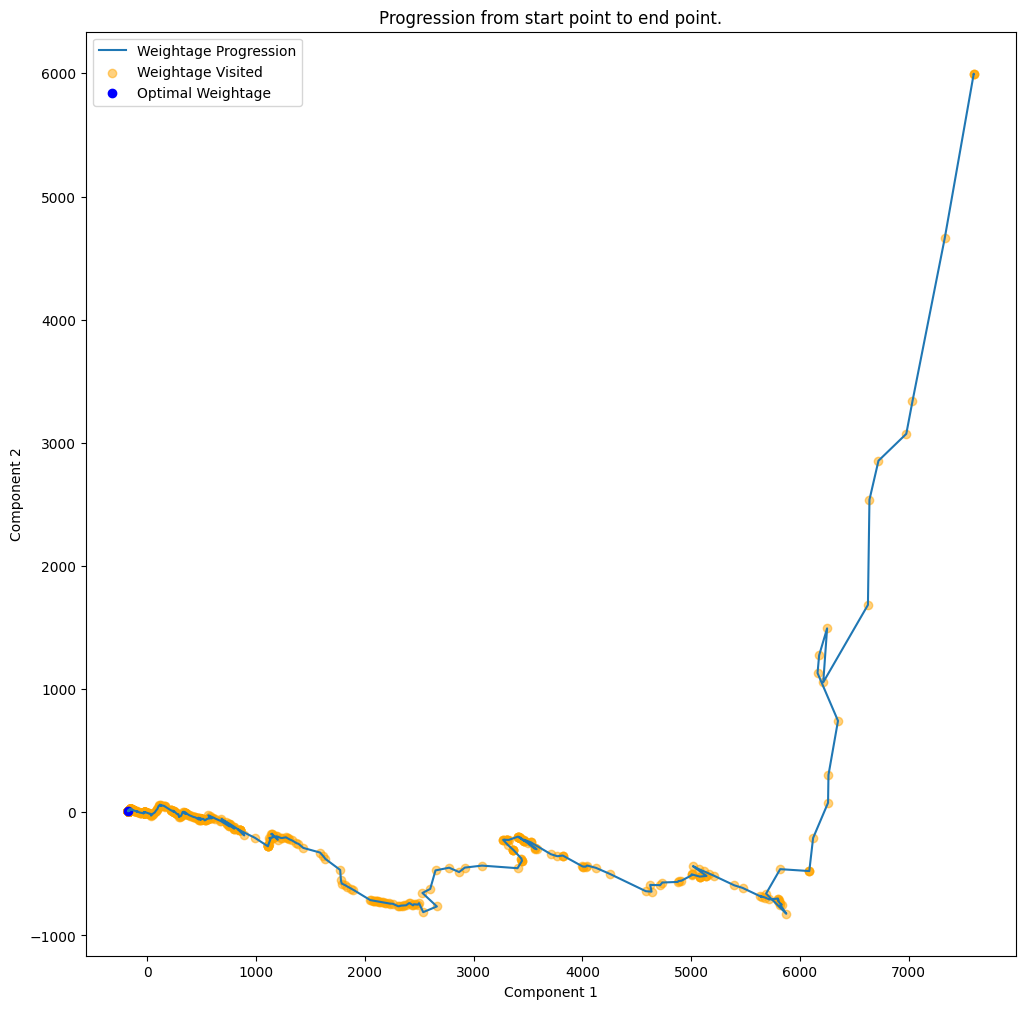

In [56]:
plt.figure(figsize=(12, 12))
plt.title("Progression from start point to end point.")
plt.plot(dataframe[0], dataframe[1], label="Weightage Progression")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.scatter(dataframe[0][:-1], dataframe[1][:-1], c="orange", alpha=0.5, label="Weightage Visited")
plt.scatter(x=dataframe[0][len(dataframe) - 2], y=dataframe[1][len(dataframe) - 2], c="blue", label="Optimal Weightage")
plt.legend()

# Loss Plot
 This shows the loss of the algorithm at each iteration. It is defined as:
 $$Loss = \frac{\sum|r_i - o_i|}{\sum |o_i|}$$
 where $r_i$ is reconstructed signal from first graph at a given iteration, and $o_i$ is the original signal that the algorithm is trying to fit.

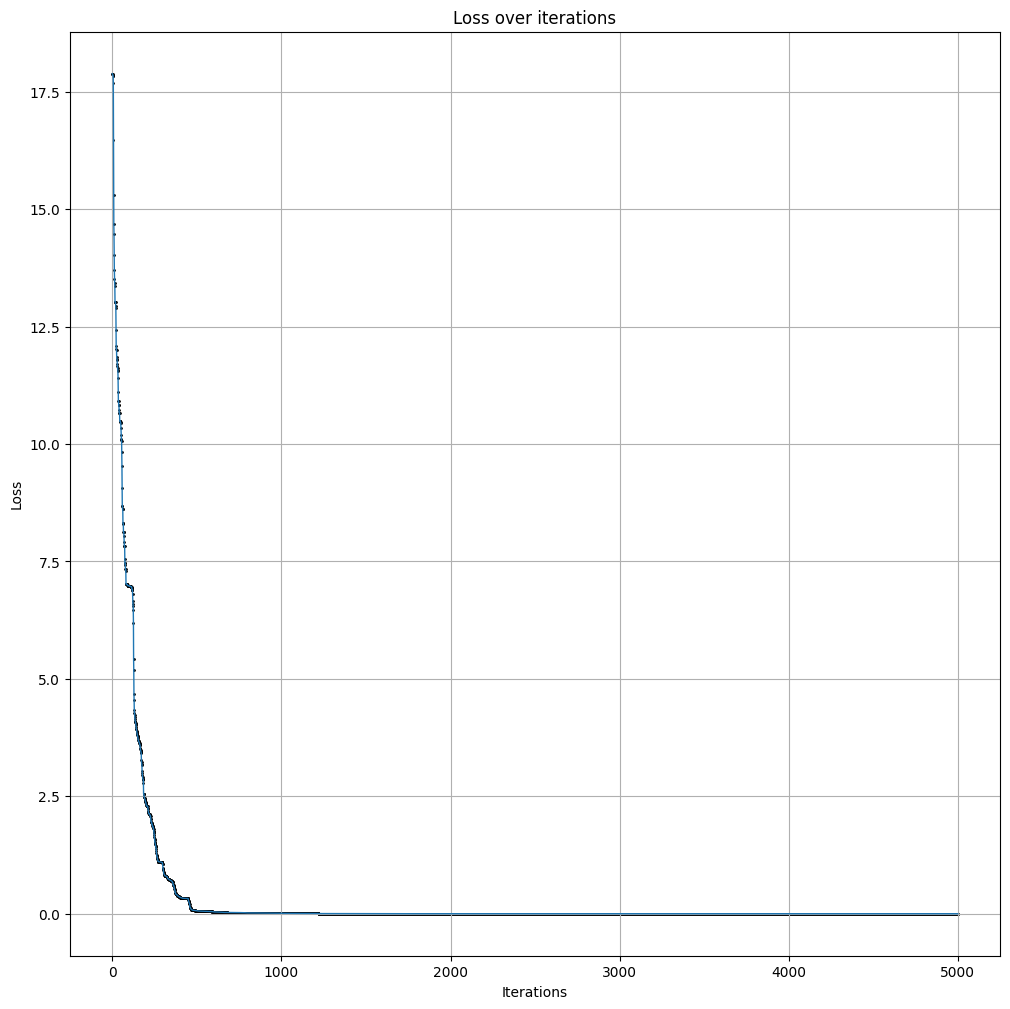

In [47]:
plt.figure(figsize=(12, 12))
plt.plot(data["error"], linewidth=1)
plt.scatter(x=range(len(data["error"])), y=data["error"], s=1, c="black")
plt.title("Loss over iterations")
plt.ylabel("Loss")
plt.xlabel("Iterations")
plt.grid()